<h1>ACTIVITY 2 - UK ACCIDENT DATA</h1>
<hr>

<h2>Analyst: Alanis Danica P. Concha</h2>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

In [2]:
accident = pd.read_csv('Datasets\\uk_accident_data.csv')

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>DATA CLEANSING</h1>

In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident.info

<bound method DataFrame.info of                 Index Accident_Severity Accident Date   Latitude  \
0       200701BS64157           Serious    05/06/2019  51.506187   
1       200701BS65737           Serious    02/07/2019  51.495029   
2       200701BS66127           Serious    26/08/2019  51.517715   
3       200701BS66128           Serious    16/08/2019  51.495478   
4       200701BS66837            Slight    03/09/2019  51.488576   
...               ...               ...           ...        ...   
660674  201091NM01760            Slight    18/02/2022  57.374005   
660675  201091NM01881            Slight    21/02/2022  57.232273   
660676  201091NM01935            Slight    23/02/2022  57.585044   
660677  201091NM01964           Serious    23/02/2022  57.214898   
660678  201091NM02142           Serious    28/02/2022  57.575210   

                   Light_Conditions           District Area  Longitude  \
0             Darkness - lights lit  Kensington and Chelsea  -0.209082   
1  

<h1>ADJUSTING DATA TYPES</h1>

In [7]:
accident['Accident_Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [8]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date                      object
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Accident_Date              datetime64[ns]
dtype: object

<h1>EXTRACTING DATE INFORMATION USING PANDA DATE TIME</h1>

In [9]:
accident['Year'] = accident['Accident_Date'].dt.year
accident['Month'] = accident['Accident_Date'].dt.month
accident['Day'] = accident['Accident_Date'].dt.day
accident['DayOfWeek'] = accident['Accident_Date'].dt.dayofweek

In [10]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Accident_Date                  0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

<h1>UNIVARIATE ANALYSIS ON ACCIDENT THAT HAPPENE IN 2019</h1>

In [11]:
df_2019 = accident[accident['Year'] == 2019] 

In [12]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")

total number of accident in 2019 is 182115


<h1>Q1: Which vehicle often gets into an accident? </h1>

In [13]:
print(accident.columns)

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Accident_Date', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')


In [14]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2> "Insight 1: The data above shows that the most vehicle that always gets into an accident is Car." </h2>

<h1>What's the Most Condition happen to accident in uk?</h1>

In [15]:
accident['Accident_Severity'].value_counts()


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>"Insight 2: Most of the accident in uk gets a slight conditions"</h2>

<h1>Q2: In what year most of the accidents happen?</h1>

In [16]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h2>Insight 3: In this data shown above it shows that the accidents in uk most happens on 2019 which has 1821115.</h2>

<h1>Q3: Which month record is the highest number of accident?</h1>

In [17]:
accident['Accident Date'].value_counts()

Accident Date
30/11/2019    704
31/01/2019    697
13/07/2019    692
13/11/2021    692
14/08/2019    688
             ... 
30/12/2022    171
25/12/2019    157
25/12/2022    145
10/01/2022    123
25/12/2020    118
Name: count, Length: 1461, dtype: int64

<h2>Insight 4: The data above shows that the month that has many accidents is in November. </h2>

<h1>Q5: How many is the overall number of the accident in the year 2019</h1>

In [18]:
df_2019 = accident[accident['Year'] == 2019] 

In [19]:
df_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Date,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019-06-05,2019,6,5,2
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019-07-02,2019,7,2,1
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,2019-08-26,2019,8,26,0
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019-08-16,2019,8,16,4
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019-09-03,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,20/12/2019,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019-12-20,2019,12,20,4
182111,2.01E+12,Serious,21/12/2019,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019-12-21,2019,12,21,5
182112,2.01E+12,Slight,23/12/2019,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019-12-23,2019,12,23,0
182113,2.01E+12,Slight,23/12/2019,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019-12-23,2019,12,23,0


<h1>Insight 5: In the record above shows the in the year 2019 has the 182115 number of accidents.</h1>

<h1>Q6: What is the number of accidents every month?</h1>

In [20]:
accident_per_month = accident.groupby("Month").size()

In [21]:
accident_per_month

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
dtype: int64

<h2>Insight 6: The records shown above is the number os accidents happen in uk per month which it shows that in the month ofNovember has the highest numbers of accident, while in the month of februry has the least number of accident.</h2>

<h1>Q7: What is the total number of accidents in year 2020?</h1>

In [22]:
accident_2020 = accident[accident["Year"] == 2020]

In [23]:
accident_2020

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Date,Year,Month,Day,DayOfWeek
182115,200801BS69439,Serious,23/01/2020,51.506812,Darkness - lights lit,Kensington and Chelsea,-0.214677,1,1,Dry,NaN,Urban,Fine no high winds,Car,2020-01-23,2020,1,23,3
182116,200801BS69594,Serious,15/02/2020,51.496323,Daylight,Kensington and Chelsea,-0.170138,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2020-02-15,2020,2,15,5
182117,200801BS69698,Serious,27/02/2020,51.502042,Darkness - lights lit,Kensington and Chelsea,-0.190946,1,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2020-02-27,2020,2,27,3
182118,200801BS69935,Serious,25/02/2020,51.492733,Daylight,Kensington and Chelsea,-0.193763,1,1,Dry,Roundabout,Urban,Fine no high winds,Car,2020-02-25,2020,2,25,1
182119,200801BS69938,Serious,27/02/2020,51.493271,Darkness - lights lit,Kensington and Chelsea,-0.199504,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020-02-27,2020,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352701,2.01E+12,Slight,24/11/2020,55.233969,Darkness - no lighting,Dumfries and Galloway,-3.394276,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Minibus (8 - 16 passenger seats),2020-11-24,2020,11,24,1
352702,2.01E+12,Slight,06/12/2020,54.983911,Daylight,Dumfries and Galloway,-3.195094,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020-12-06,2020,12,6,6
352703,2.01E+12,Slight,17/12/2020,55.008072,Darkness - no lighting,Dumfries and Galloway,-3.334825,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2020-12-17,2020,12,17,3
352704,2.01E+12,Slight,16/12/2020,54.986388,Daylight,Dumfries and Galloway,-3.180789,1,1,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2020-12-16,2020,12,16,2


<h2>Insight 7: the total number of accident in 2020 is 170591.</h2>

<h1>Q8: What is the total Longitude of accidents in year 2022?</h1>

In [24]:
accident_2022 = accident[accident["Year"] == 2022]

In [25]:
total_longitude = accident_2022["Longitude"].sum()

In [26]:
total_longitude

np.float64(-183231.037942)

<h2>Insight 8: The total longitutude in year 2022 is -183231.037942</h2>

<h1>Q9: What is the total latitude in year 2021?</h1>

In [27]:
accident_2021 = accident[accident["Year"] == 2021]

In [28]:
total_latitude = accident_2021["Longitude"].sum()

In [29]:
total_latitude

np.float64(-238348.30400200002)

<h2>Insight 9: Based in the Record show above the total latitude in year 2021 is -238348.30400200002.</h2>

<H1>Q10: What is the district Area that most often gets into an accident?</H1>

In [30]:
accident_per_district = accident.groupby("District Area").size()

In [31]:
accident_per_district

District Area
Aberdeen City    1323
Aberdeenshire    1930
Adur              619
Allerdale        1128
Alnwick           232
                 ... 
Wychavon         1361
Wycombe          1729
Wyre             1238
Wyre Forest       969
York             1897
Length: 422, dtype: int64

<h2>Insight 10: It show in data above that the district area most gets into accidents is Aberdeenshire.</h2>

<h1>Q11: What is the total number of accidents in rural and urban place in uk?</h1>

In [32]:
accident_df = accident.groupby("Urban_or_Rural_Area").size()

In [33]:
accident_df

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421663
dtype: int64

<h2>Insight 11: The number of accidents in rural is 238990 and in urban is 421663.</h2>

<h1>Q12: What is the common road type in uk gets into an accident?</h1>

In [34]:
road_df = accident.groupby("Road_Type").size()

In [35]:
road_df

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    492143
Slip road               7041
dtype: int64

<h2>Insight 12: The Common road type in uk gets into an accidents is Single carriageway.</h2>

<h1>Q13: In what common Road surface vehicles gets in to an accidents?</h1>

In [36]:
surf_df = accident['Road_Surface_Conditions'].value_counts()

In [37]:
surf_df

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h2>Insight 13: Most of the vehicle accidents in a Dry Road</h2>

<h1>Q14: What is the overall number of Vehicles that gets into an accidents? </h1>

In [38]:
overall_df = accident['Number_of_Vehicles'].sum()

In [39]:
overall_df

np.int64(1209872)

<h2>Insight 14: The Overall number of Vehicles that gets into an accidents is 1209872</h2>

<h1>Q15: What is the average number of casualties per accident?</h1>

In [40]:
accident['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h2>Insight 15: The data shows that the number of casualties per accident is 1.357040257068864. </h2>

<h1>Q16: What is the median number of vehicles involved in accidents?</h1>

In [41]:
accident['Number_of_Vehicles'].median()

np.float64(2.0)

<h2>Insight 16: The median number of vehicles involved in accidents is 2.0 .</h2>

<h1>Q17: What is the most common accident severity?</h1>

In [42]:
accident['Accident_Severity'].mode()

0    Slight
Name: Accident_Severity, dtype: object

<h2>Insight 17: The most common accident severity in uk is slight.</h2>

<h1>Q18: How many fatal accidents are there?</h1>

In [43]:
(accident['Accident_Severity'] == 'Fatal').sum()

np.int64(8661)

<h2>Insight 18: The fatal accidents in the uk is number of 8661.</h2>

<h1>Q19: What are the top 5 weather conditions reported in accidents?</h1>

In [44]:
accident['Weather_Conditions'].value_counts().head(5)

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Name: count, dtype: int64

<h2>Insight 19: This data shows the top five weather conditions reported in uk that sometimes may cause an accidents.</h2>

<h1>Q20: What is the total number of vehicles involved in all accidents?</h1>

In [45]:
accident['Number_of_Vehicles'].sum()

np.int64(1209872)

<h2>Insight 20: The total number of vehicles involved in all accident in uk is 1209872.</h2>

<h1>Q21: What is the average number of vehicles involved in accidents?</h1>

In [46]:
accident['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h2>Insight 21: It shows that the average number of vehicles involve in accident is 1.8312554205597575. </h2>

<h1>Q22: What is the median number of casualties per accident?</h1>

In [47]:
accident['Number_of_Casualties'].median()

np.float64(1.0)

<h2>Insight 22: The median number of casualties per accidents is 1.0 .</h2>

<h1>Q23: What is the most common road surface condition?</h1>

In [48]:
accident['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: object

<h2>Insight 23: The most common road surface condition is Dry. </h2>

<h1>Q24: How many accidents happened during daylight?</h1>

In [49]:
(accident['Light_Conditions'] == 'Daylight').sum()

np.int64(484880)

<h2>Insight 24: The number of Accidents happens in Daylight is 484880 .</h2>

<h1>Q25: What is the most common district where accidents occurred?</h1>

In [50]:
accident['District Area'].mode()

0    Birmingham
Name: District Area, dtype: object

<h2>Insight 25: The info shows that the another common district where accidents is Birmingham. </h2>

<hr></hr>

<h1>Visualizations</h1>

<Axes: xlabel='Year'>

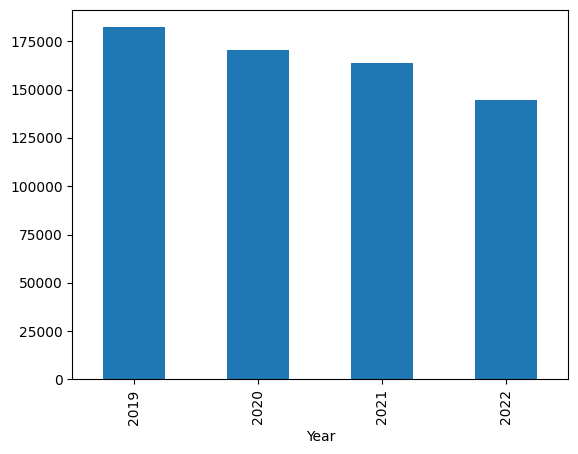

In [51]:
import matplotlib.pyplot as plt
accident.groupby(['Year'])['Index'].count().plot(kind='bar')

In [52]:
monthly_date = accident.groupby(['Year','Month'])['Index'].count()

In [53]:
monthly_date.unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


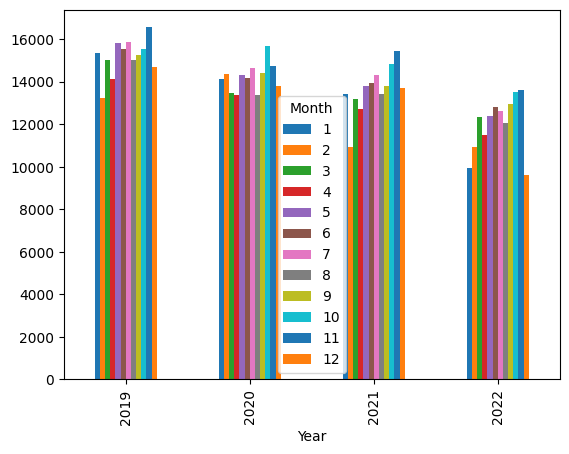

In [54]:
import matplotlib.pyplot as plt
monthly_date.unstack().plot(kind='bar')
plt.show()

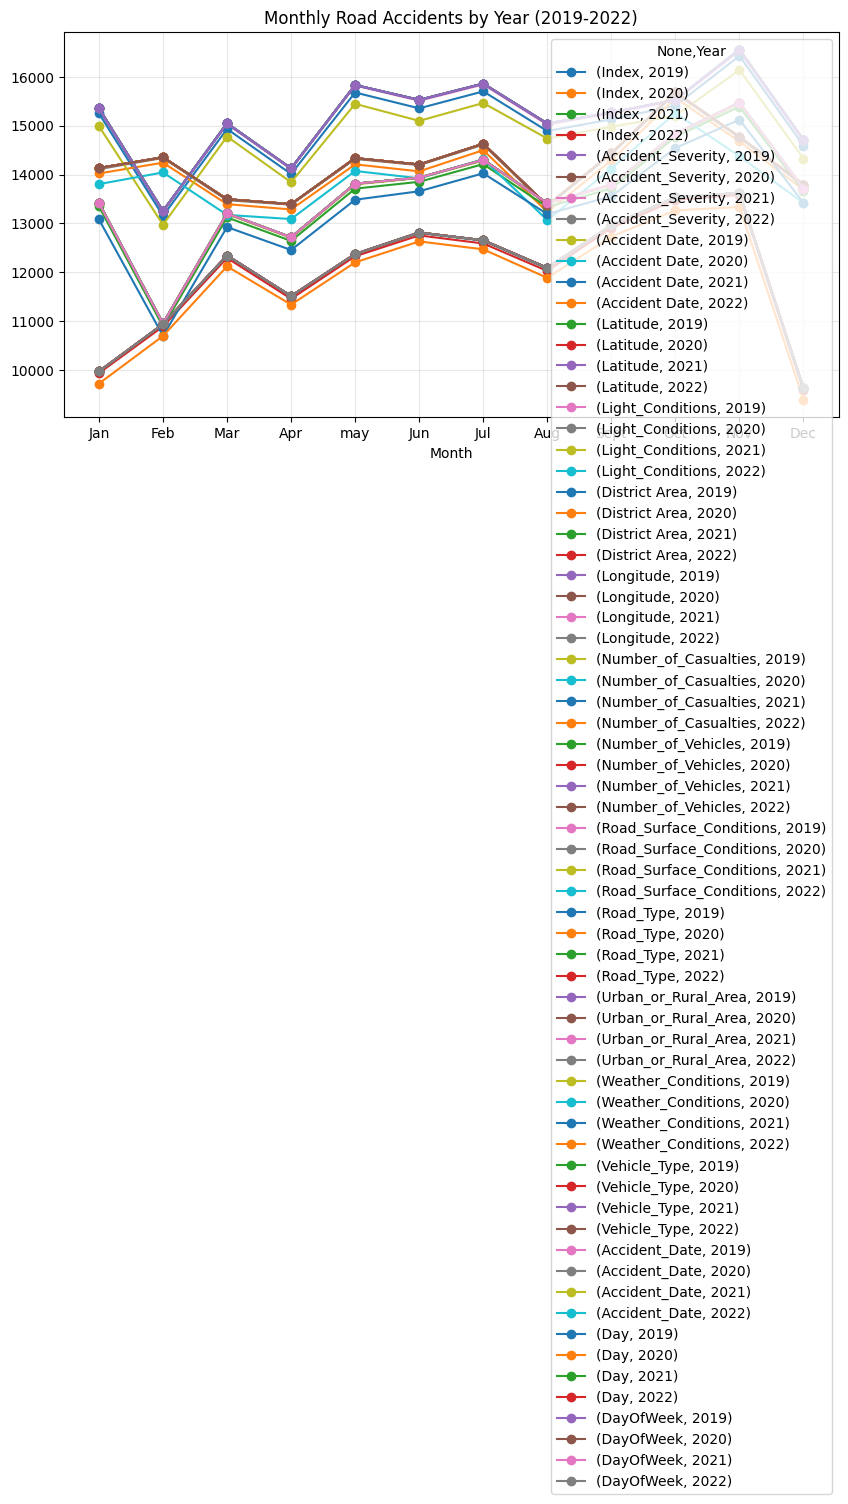

In [55]:
import matplotlib.pyplot as plt

monthly_data = accident.groupby(['Year', 'Month']).count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13),['Jan','Feb','Mar','Apr','may','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [56]:
london_fatal = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['District Area'] == 'City of London')]

In [57]:
london_fatal

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Date,Year,Month,Day,DayOfWeek
717,200701CP00032,Fatal,30/01/2019,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019-01-30,2019,1,30,2
997,200701CP00318,Fatal,19/11/2019,51.516045,Darkness - lights lit,City of London,-0.081859,7,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle over 500cc,2019-11-19,2019,11,19,1
183074,200801CP00222,Fatal,18/09/2020,51.510836,Daylight,City of London,-0.093319,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2020-09-18,2020,9,18,4
183146,200801CP00295,Fatal,28/11/2020,51.518081,Darkness - lights lit,City of London,-0.079900,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2020-11-28,2020,11,28,5
353392,200901CP00040,Fatal,24/04/2021,51.509631,Daylight,City of London,-0.085587,2,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021-04-24,2021,4,24,5
368287,200901TB00089,Fatal,12/06/2021,51.517812,Daylight,City of London,-0.107586,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2021-06-12,2021,6,12,5
517269,201001CP00342,Fatal,17/08/2022,51.515808,Daylight,City of London,-0.089364,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022-08-17,2022,8,17,2


In [59]:
accident["Latitude"] = accident["Latitude"].fillna(accident["Latitude"].mean())
accident["Longitude"] = accident["Longitude"].fillna(accident["Longitude"].mean())

In [60]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Accident_Date                  0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64